# Distribution

## Netzwerktyp

Bei einem skalenfreien Netzwerk handelt es sich bei der Gradverteilung um ein Potenzgesetz.

In [1]:
%pylab inline
import powerlaw
print(powerlaw.__version__)

import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

Populating the interactive namespace from numpy and matplotlib
1.4.4


In [2]:
def plot_degree_histogram(deg, cnt): 
    plt.xscale('log')
    plt.yscale('log')
    plt.scatter(deg,cnt,c='b',marker='.',s=15)

    plt.xlabel('Degree')
    plt.ylabel('Frequency')

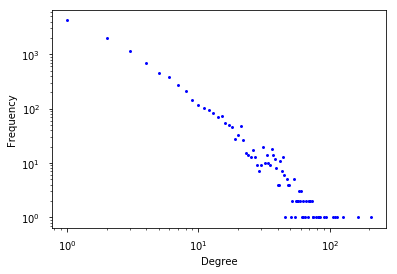

In [5]:
import networkx as nx
from collections import Counter
from scipy import stats

A = np.loadtxt('Data/arenas-pgp/out.arenas-pgp', dtype=int, usecols=range(2), comments="%")
G=nx.Graph()
for n in A:
    G.add_edge(n[0], n[1])
degree_sequence = sorted([degree for node, degree in G.degree()], reverse=True) 
degree_count = Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

plot_degree_histogram(deg, cnt)

In [11]:
def average_degree(G):
    return 2 * G.number_of_edges() / G.number_of_nodes()

def moment(graph_data,n):
    degree_per_node = nx.degree(graph_data)

    val = 0
    for deg in degree_per_node:
         val += deg[1] ** n

    return val / float(nx.number_of_nodes(graph_data))

avg_deg = average_degree(G)
number_of_nodes = nx.number_of_nodes(G)
number_of_edges= nx.number_of_edges(G)
highest_degree = degree_sequence[0]
lowest_degree = degree_sequence[len(degree_sequence)-1]
avg_clustering = nx.average_clustering(G)
diameter = nx.diameter(G)

print("Number of Nodes: " + str(number_of_nodes))
print("Number of Edges: " + str(number_of_edges))
print("avg degree: " + str(avg_deg))
print("1st moment: " + str(moment(G, 1)))
print("2nd moment: " + str(moment(G, 2)))
print("3rd moment: " + str(moment(G, 3)))
print("highest degree: " + str(highest_degree))
print("lowest degree: " + str(lowest_degree))
print("average clustering coefficient: " + str(avg_clustering))
print("diameter: " + str(diameter))

Number of Nodes: 10680
Number of Edges: 24316
avg degree: 4.5535580524344565
1st moment: 4.5535580524344565
2nd moment: 85.97621722846442
3rd moment: 4462.983333333334
highest degree: 205
lowest degree: 1
average clustering coefficient: 0.2659452243010437
diameter: 24


### estimating alpha

Eine einfache Schätzung für Alpha kann erreicht werden, in dem eine Gerade an Pk in einem log-log Plot gefittet wird. Dieser Ansatz hat jedoch den Nachteil systematische Fehlern zuzulassen, was in einer fehlerhaften Schätzung resultiert.

Statistische Methoden: TODO

In [8]:
fit = powerlaw.Fit(cnt)
print(fit.power_law.alpha)
print(fit.power_law.sigma)
print(fit.power_law.xmin)
print(fit.distribution_compare('power_law', 'exponential'))

1.699668551364584
0.16051497417745886
46.0
(11.178641906212746, 0.03562829308960729)


Calculating best minimal value for power law fit


Text(0.5, 0, 'Degree')

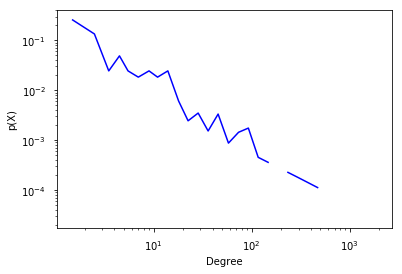

In [11]:
#probability density function (PDF)
figPDF = powerlaw.plot_pdf(cnt, color='b')
figPDF.set_ylabel("p(X)")
figPDF.set_xlabel(r"Degree")

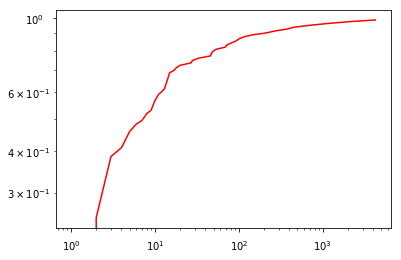

In [22]:
#cumulative distribution function (CDF)
powerlaw.plot_cdf(cnt, color="r")

Text(0.5, 0, 'Degree')

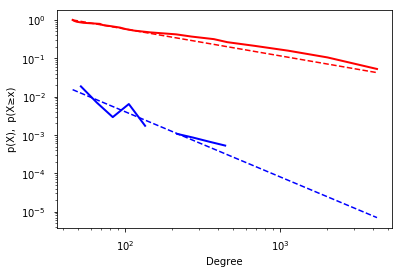

In [12]:
figCCDF = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=figCCDF)
fit.plot_ccdf(color='r', linewidth=2, ax=figCCDF)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)
####
figCCDF.set_ylabel(u"p(X),  p(X≥x)")
figCCDF.set_xlabel(r"Degree")


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


alpha no x max: 
1.3501760734254842
alpha with x max: 
1.2898996421425264


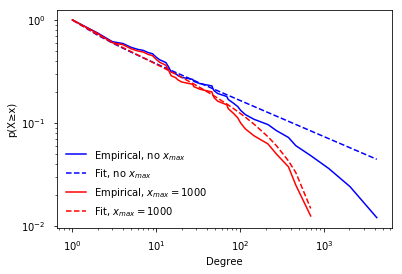

In [21]:
#no x max
fit = powerlaw.Fit(cnt, discrete=True, xmax=None)
FigCCDFmax = fit.plot_ccdf(color='b', label=r"Empirical, no $x_{max}$")
fit.power_law.plot_ccdf(color='b', linestyle='--', ax=FigCCDFmax, label=r"Fit, no $x_{max}$")
print("alpha no x max: ")
print(fit.power_law.alpha)

#with x max
fit = powerlaw.Fit(cnt, discrete=True, xmax=1000)
fit.plot_ccdf(color='r', label=r"Empirical, $x_{max}=1000$")
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=FigCCDFmax, label=r"Fit, $x_{max}=1000$")
print("alpha with x max: ")
print(fit.power_law.alpha)

FigCCDFmax.set_ylabel(u"p(X≥x)")
FigCCDFmax.set_xlabel(r"Degree")
handles, labels = FigCCDFmax.get_legend_handles_labels()
leg = FigCCDFmax.legend(handles, labels, loc=3)
leg.draw_frame(False)

Analyse CA Subgraph

In [13]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
print(sorted(map(sorted, next_level_communities)))

KeyboardInterrupt: 

## Links
- http://nbviewer.jupyter.org/github/jeffalstott/powerlaw/blob/master/manuscript/Manuscript_Code.ipynb
- https://scipy-cookbook.readthedocs.io/items/FittingData.html
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3906378/
- https://github.com/jeffalstott/powerlaw
- https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.powerlaw.html